## EDA of the NSAF-atlas

Still work in progress

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',database='expression_atlas_cells')
mycursor = conn.cursor(buffered = True)

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")

connection succesfull


In [4]:
NSAF_atlas = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/proteome_nsaf_1.csv")
NSAF_atlas = NSAF_atlas.pivot(index = "assay_id", columns = "uniprot_id", values = "NSAF").fillna(0).reset_index()
NSAF_atlas.shape

(859, 9298)

In [5]:
NSAF_atlas.head()

uniprot_id,assay_id,A0A1B0GTU1,A0A1B0GUS4,A0AV02,A0AV96,A0AVF1,A0AVK6,A0AVT1,A0FGR8,A0JLT2,...,Q9Y6W3,Q9Y6W5,Q9Y6X3,Q9Y6X4,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8
0,30960,0.0,0.000802,0.0,0.0,0.0,0.0,0.000587,0.0,0.0,...,0.000304,0.00000,0.0,0.0,0.0,0.000000,0.000120,0.0,0.0,0.000000
1,30961,0.0,0.000748,0.0,0.0,0.0,0.0,0.000766,0.0,0.0,...,0.000425,0.00000,0.0,0.0,0.0,0.000000,0.000112,0.0,0.0,0.000115
2,30962,0.0,0.000000,0.0,0.0,0.0,0.0,0.000374,0.0,0.0,...,0.000323,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,30963,0.0,0.000000,0.0,0.0,0.0,0.0,0.000910,0.0,0.0,...,0.000000,0.00048,0.0,0.0,0.0,0.000000,0.000116,0.0,0.0,0.000000
4,30964,0.0,0.000000,0.0,0.0,0.0,0.0,0.000811,0.0,0.0,...,0.000000,0.00049,0.0,0.0,0.0,0.000291,0.000000,0.0,0.0,0.000000


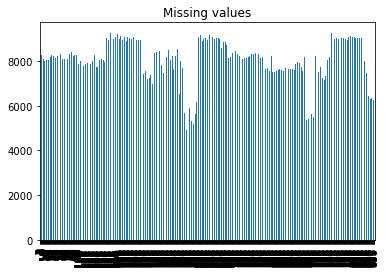

In [8]:
NSAF_atlas[NSAF_atlas==0].count(axis = 1).plot(kind = "bar", title = "Missing values")

In [6]:
NSAF_atlas_count = NSAF_atlas.set_index("assay_id")
NSAF_atlas_count = NSAF_atlas_count[(NSAF_atlas_count > 0)].count(axis = 1)

Text(0, 0.5, 'Number of proteins')

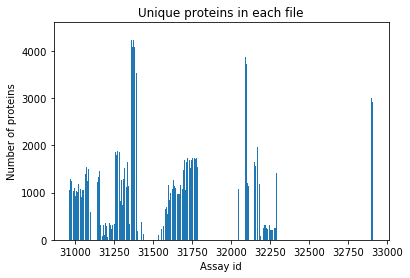

In [7]:
count_proteins = NSAF_atlas_count.reset_index(name = "n_proteins")
#count_proteins.to_csv("proteins_per_assay.csv", index = False)
plt.bar(count_proteins.assay_id, count_proteins.n_proteins)
plt.title("Unique proteins in each file")
plt.xlabel("Assay id")
plt.ylabel("Number of proteins")

In [8]:
assay_cell = pd.read_sql_query("SELECT * FROM cell_to_assay", conn)
assay_cell = pd.merge(assay_cell, pd.read_sql_query("SELECT cell_id, cell_line FROM cell", conn), on = "cell_id")
assay_cell.drop("cell_id", axis = 1, inplace = True)
NSAF_atlas_info = pd.merge(NSAF_atlas, assay_cell, on = "assay_id", how = "left")
project_inf = pd.read_sql_query("SELECT project_id, PXD_accession FROM project", conn)
assay_inf = pd.read_sql_query("SELECT assay_id, project_id, filename FROM assay", conn)
project_assay = pd.merge(assay_inf, project_inf, on = "project_id")
project_assay.drop("project_id", axis = 1, inplace = True)
NSAF_atlas_info = pd.merge(NSAF_atlas_info, project_assay, on = "assay_id")
NSAF_atlas_info_copy = NSAF_atlas_info.copy()
#NSAF_atlas_info.drop("assay_id", axis = 1, inplace = True)
NSAF_atlas_info.head()

,assay_id,A0A1B0GTU1,A0A1B0GUS4,A0AV02,A0AV96,A0AVF1,A0AVK6,A0AVT1,A0FGR8,A0JLT2,...,Q9Y6X4,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,cell_line,filename,PXD_accession
0,30960,0.0,0.000802,0.0,0.0,0.0,0.0,0.000587,0.0,0.0,...,0.0,0.0,0.000000,0.000120,0.0,0.0,0.000000,Hep3B,3B10-1,PXD000533
1,30961,0.0,0.000748,0.0,0.0,0.0,0.0,0.000766,0.0,0.0,...,0.0,0.0,0.000000,0.000112,0.0,0.0,0.000115,Hep3B,3B10-2,PXD000533
2,30962,0.0,0.000000,0.0,0.0,0.0,0.0,0.000374,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,Hep3B,3B1-1,PXD000533
3,30963,0.0,0.000000,0.0,0.0,0.0,0.0,0.000910,0.0,0.0,...,0.0,0.0,0.000000,0.000116,0.0,0.0,0.000000,Hep3B,3B11-1,PXD000533
4,30964,0.0,0.000000,0.0,0.0,0.0,0.0,0.000811,0.0,0.0,...,0.0,0.0,0.000291,0.000000,0.0,0.0,0.000000,Hep3B,3B11-2,PXD000533


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Number of proteins')

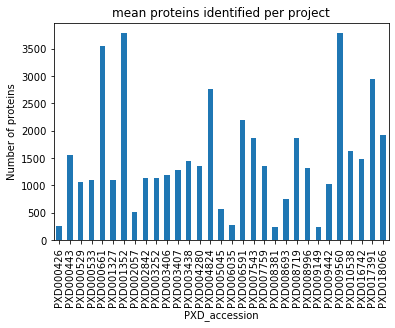

In [9]:
prot_per_assay_copy = NSAF_atlas_info_copy.groupby(["PXD_accession", 'assay_id']).sum()
prot_per_assay_copy = prot_per_assay_copy[prot_per_assay_copy > 0].count(axis = 1)
prot_per_assay_copy.to_csv("proteins_per_assay.csv")
prot_per_assay_copy.mean(level = 0).plot(kind = "bar", title = "mean proteins identified per project")
plt.ylabel("Number of proteins")

Text(0.5, 0, 'PXD_accession')

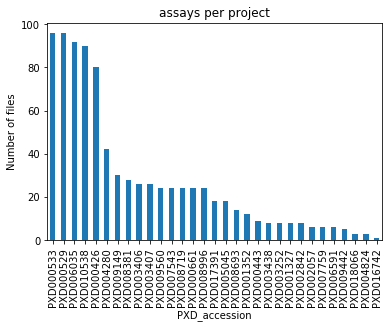

In [10]:
NSAF_atlas_info["PXD_accession"].value_counts().plot(kind = "bar", title = "assays per project")
plt.ylabel("Number of files")
plt.xlabel("PXD_accession")

Text(0, 0.5, 'Number of proteins')

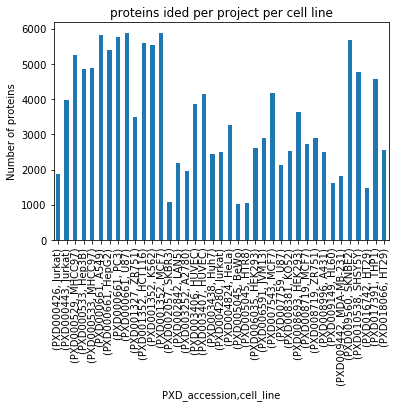

In [11]:
grouped_prot_NSAF = NSAF_atlas_info.groupby(["PXD_accession", "cell_line"]).sum()
grouped_prot_NSAF = grouped_prot_NSAF[grouped_prot_NSAF > 0].count(axis = 1)
grouped_prot_NSAF.plot(kind = "bar", legend = False, title = "proteins ided per project per cell line")
plt.ylabel("Number of proteins")

For some files, very few proteins were identified. In total, this project identifies many more proteins per cell line, meaning the file does not contain a full proteome representation of the cell line. <br>When looking at the projects, it appeared samples were loaded in fractions whereby multiple RAW-runs each analysed a fraction of the sample proteome.

In [12]:
NSAF_atlas_info["Protein_count"] = NSAF_atlas_info[NSAF_atlas_info.iloc[:,1:-3] > 0].iloc[:,1:-3].count(axis = 1)

In [13]:
NSAF_atlas_info.loc[:, "assay_id cell_line filename PXD_accession Protein_count".split()].to_csv("Format_pool.csv")

Manual annotation was done for which assays to pool with which. <br>
These assays were pooled in the notebook *'pooled_NSAF_atlas.ipynb'*

---

Visualising the effect of pooling samples with project PXD003406, which both has unfractionated and fractionated samples but are all samples of the same cell line

Text(0.5, 1.0, 'Identified proteins for each file in PXD003406')

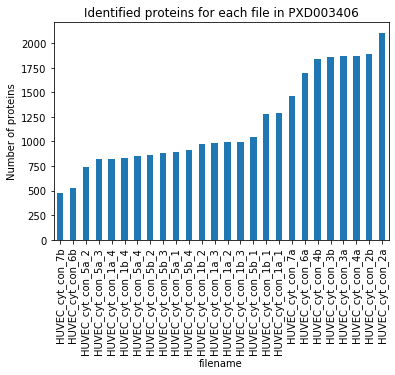

In [13]:
HUVEC_check = pd.read_csv("proteins_per_assay.csv", header = None)
HUVEC_check = HUVEC_check.rename(columns = {0 : "PXD", 1: "assay_id", 2 : "n_proteins"})
HUVEC_check = HUVEC_check[HUVEC_check.PXD == "PXD003406"]
filenames = pd.read_sql("SELECT assay_id, filename FROM assay", conn)
HUVEC_check = pd.merge(HUVEC_check, filenames, on = "assay_id")
HUVEC_check = HUVEC_check.set_index("filename")
HUVEC_check.n_proteins.sort_values().plot(kind = "bar")
plt.ylabel("Number of proteins")
plt.title("Identified proteins for each file in PXD003406")

Finding PCs for original dataset of PXD003406

In [41]:
HUVEC_test = pd.merge(NSAF_atlas_info_copy, filenames, on = "assay_id")
HUVEC_test = HUVEC_test[HUVEC_test.PXD_accession == "PXD003406"].drop(["assay_id", "PXD_accession", "cell_line"], axis = 1)
HUVEC_test["fractioned"] = np.where(HUVEC_test.filename_x.str.count("_") == 4, "fractioned", "whole_lysate")
HUVEC_filenames, fraction_status, bin_ = HUVEC_test.pop("filename_x"), HUVEC_test.pop("fractioned"), HUVEC_test.pop("filename_y")
HUVEC_filenames.reset_index(drop = True, inplace = True)
fraction_status.reset_index(drop = True, inplace = True)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(HUVEC_test)
#pca_results = pca.transform(HUVEC_test)
principalDf = pd.DataFrame(data = pca_results, columns = ['PC1', 'PC2'])
fractioned_df = pd.concat([principalDf, HUVEC_filenames, fraction_status], axis = 1)
fractioned_df.head()

,PC1,PC2,filename_x,fractioned
0,0.010232,-0.001896,HUVEC_cyt_con_3b,whole_lysate
1,0.008868,-0.003924,HUVEC_cyt_con_6a,whole_lysate
2,0.053603,-0.006809,HUVEC_cyt_con_5b_4,fractioned
3,0.005138,-0.003419,HUVEC_cyt_con_2a,whole_lysate
4,0.066875,-0.018624,HUVEC_cyt_con_1a_4,fractioned


Importing pooled_NSAF atlas

In [22]:
assay_cell = pd.read_sql_query("SELECT * FROM cell_to_assay", conn)
assay_cell = pd.merge(assay_cell, pd.read_sql_query("SELECT cell_id, cell_line FROM cell", conn), on = "cell_id")
assay_cell.drop("cell_id", axis = 1, inplace = True)
project_inf = pd.read_sql_query("SELECT project_id, PXD_accession FROM project", conn)
assay_inf = pd.read_sql_query("SELECT assay_id, project_id FROM assay", conn)
project_assay = pd.merge(assay_inf, project_inf, on = "project_id")
info_df = pd.merge(assay_cell, project_assay, on = "assay_id")
info_df = pd.merge(info_df, filenames, on = "assay_id")
pooled_df = pd.read_csv("/home/compomics/Sam/git/python/master_thesis/Atlas_creation/pooled_proteome_nsaf_1.csv")
pooled_NSAF_atlas = pooled_df.pivot(index = "assay_id", columns = "uniprot_id", values = "NSAF").fillna(0).reset_index()
pooled_NSAF_atlas = pd.merge(pooled_NSAF_atlas, info_df, on = "assay_id", how = "left")
pooled_NSAF_atlas.head()

,assay_id,A0A1B0GTU1,A0A1B0GUS4,A0AV02,A0AV96,A0AVF1,A0AVK6,A0AVT1,A0FGR8,A0JLT2,...,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,cell_line,project_id,PXD_accession,filename
0,30960,0.0,0.000098,0.000000,0.0,0.0,0.0,0.000425,0.0,0.0,...,0.000044,0.000042,0.000093,0.000141,0.0,0.000136,Hep3B,1815,PXD000533,3B10-1
1,30961,0.0,0.000033,0.000014,0.0,0.0,0.0,0.000397,0.0,0.0,...,0.000044,0.000060,0.000088,0.000078,0.0,0.000126,Hep3B,1815,PXD000533,3B10-2
2,31008,0.0,0.000067,0.000000,0.0,0.0,0.0,0.000256,0.0,0.0,...,0.000000,0.000012,0.000045,0.000056,0.0,0.000166,MHCC97,1815,PXD000533,H10-1
3,31009,0.0,0.000067,0.000000,0.0,0.0,0.0,0.000255,0.0,0.0,...,0.000000,0.000012,0.000065,0.000056,0.0,0.000098,MHCC97,1815,PXD000533,H10-2
4,31098,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000493,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,LAN5,1817,PXD002842,FASP_1_01


Store this atlas for t-SNE analysis in *t-SNE_plot.ipynb*

In [8]:
pooled_NSAF_atlas.to_csv("tsne_atlas2.csv", index = False)

Finding PCs for pooled dataset of PXD003406, with the fitted PCA model of the fractioned dataset

In [39]:
HUVEC_pooled = pooled_NSAF_atlas[pooled_NSAF_atlas.PXD_accession == "PXD003406"].drop(["assay_id", "project_id", "PXD_accession", "cell_line"], axis = 1)
HUVEC_pooled["fractioned"] = np.where(HUVEC_pooled.filename.str.count("_") == 4, "fractioned", "whole_lysate")
pooled_HUVEC_fractioned, pooled_HUVEC_filenames = HUVEC_pooled.pop("fractioned"), HUVEC_pooled.pop("filename")
pooled_HUVEC_filenames.reset_index(drop = True, inplace = True)
pooled_HUVEC_fractioned.reset_index(drop = True, inplace = True)
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(HUVEC_pooled)
#pca_results = pca.transform(HUVEC_pooled)
principalDf = pd.DataFrame(data = pca_results, columns = ['PC1', 'PC2'])
pooled_df = pd.concat([principalDf, pooled_HUVEC_filenames, pooled_HUVEC_fractioned], axis = 1)
pooled_df.head()

,PC1,PC2,filename,fractioned
0,0.004364,-0.012257,HUVEC_cyt_con_3b,whole_lysate
1,0.003360,-0.003882,HUVEC_cyt_con_6a,whole_lysate
2,-0.024666,0.017087,HUVEC_cyt_con_5b_4,fractioned
3,0.001982,-0.006770,HUVEC_cyt_con_2a,whole_lysate
4,-0.022416,0.003402,HUVEC_cyt_con_1a_4,fractioned


Text(0.5, 1.0, 'After pooling')

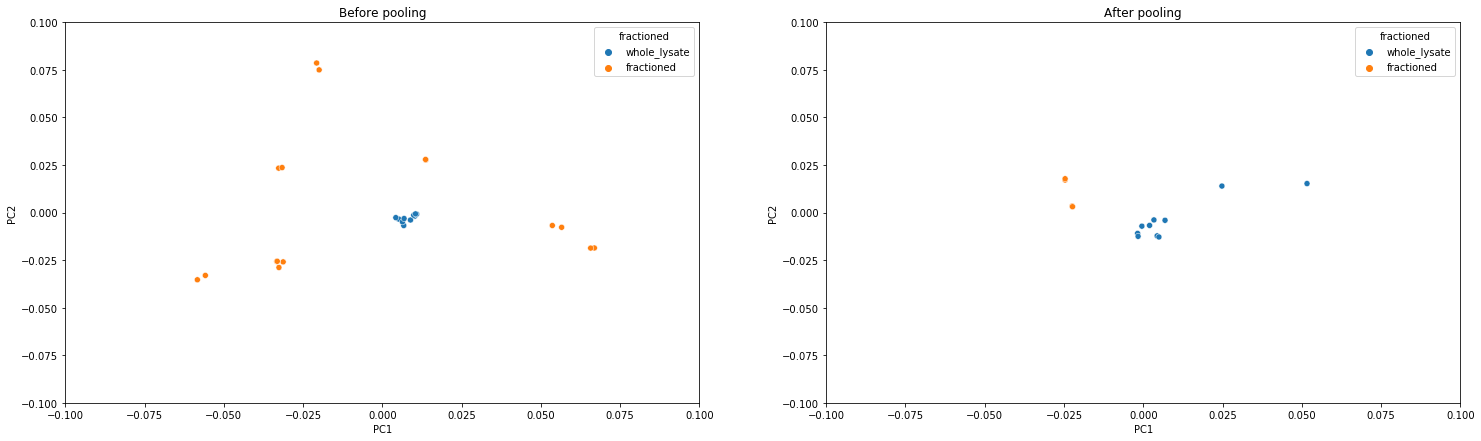

In [42]:
plt.figure(figsize=(25,7))

plt.subplot(1,2,1)
sns.scatterplot(data=fractioned_df, x='PC1', y='PC2', hue='fractioned')
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.title("Before pooling")

plt.subplot(1,2,2)
sns.scatterplot(data=pooled_df, x='PC1', y='PC2', hue='fractioned')
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.title("After pooling")

The samples stay different but is probably due to achieving different identifications when running each fractioned sample on the LC-MS/MS.

In [50]:
HUVEC_pooled.reset_index(drop = True, inplace = True)
pd.concat([HUVEC_pooled, pooled_HUVEC_filenames], axis = 1)

,A0A1B0GTU1,A0A1B0GUS4,A0AV02,A0AV96,A0AVF1,A0AVK6,A0AVT1,A0FGR8,A0JLT2,A0JNW5,...,Q9Y6W5,Q9Y6X3,Q9Y6X4,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,filename
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000478,0.0,0.0,0.0,...,0.000367,0.0,0.0,0.000101,0.000000,0.0,0.000000,0.0,0.000137,HUVEC_cyt_con_3b
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000384,0.0,0.0,0.0,...,0.000270,0.0,0.0,0.000148,0.000000,0.0,0.000000,0.0,0.000538,HUVEC_cyt_con_6a
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000398,0.0,0.0,0.0,...,0.000263,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000105,HUVEC_cyt_con_5b_4
3,0.0,0.000575,0.0,0.0,0.0,0.0,0.000294,0.0,0.0,0.0,...,0.000355,0.0,0.0,0.000195,0.000000,0.0,0.000069,0.0,0.000265,HUVEC_cyt_con_2a
4,0.0,0.000195,0.0,0.0,0.0,0.0,0.000485,0.0,0.0,0.0,...,0.000331,0.0,0.0,0.000033,0.000000,0.0,0.000000,0.0,0.000180,HUVEC_cyt_con_1a_4
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.000434,0.0,0.0,0.0,...,0.000367,0.0,0.0,0.000404,0.000000,0.0,0.000000,0.0,0.000091,HUVEC_cyt_con_3a
6,0.0,0.000191,0.0,0.0,0.0,0.0,0.000489,0.0,0.0,0.0,...,0.000325,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000206,HUVEC_cyt_con_1b_4
7,0.0,0.000098,0.0,0.0,0.0,0.0,0.000358,0.0,0.0,0.0,...,0.000302,0.0,0.0,0.000000,0.000000,0.0,0.000023,0.0,0.000135,HUVEC_cyt_con_5a_1
8,0.0,0.000000,0.0,0.0,0.0,0.0,0.000536,0.0,0.0,0.0,...,0.000566,0.0,0.0,0.000208,0.000000,0.0,0.000000,0.0,0.000141,HUVEC_cyt_con_4a
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000807,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,HUVEC_cyt_con_7b


Text(0.5, 1.0, 'Identified proteins for each file in PXD003406')

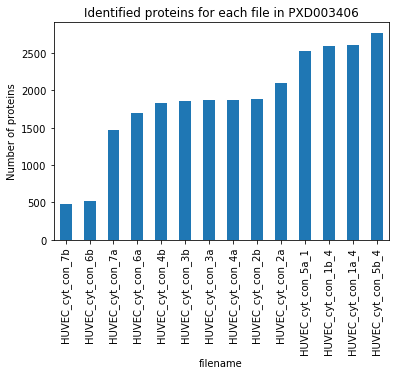

In [55]:
HUVEC_pooled
HUVEC_pooled.reset_index(drop = True, inplace = True)
HUVEC_pooled1 = pd.concat([HUVEC_pooled, pooled_HUVEC_filenames], axis = 1)
HUVEC_NSAF_atlas_count = HUVEC_pooled1.set_index("filename")
HUVEC_NSAF_atlas_count = HUVEC_NSAF_atlas_count[(HUVEC_NSAF_atlas_count > 0)].count(axis = 1)
HUVEC_NSAF_atlas_count.sort_values().plot(kind = "bar")
plt.ylabel("Number of proteins")
plt.title("Identified proteins for each file in PXD003406")

Maybe drop HUVEC_cyt_con_7b and HUVEC_cyt_con_6b? Something went wrong during that experiment??